Censo realizado en estados unidos en 1994.
Se recoge informacion sociodemográfica junto con una columna que indica si la persona, tenía ingresos por más de 50K dolares.

Datos de la Universidad de California.

<table>
<tr>
    <th>Columns</th>
    <th>Descriptions</th>
</tr>
<tr>
    <td>age</td>
    <td> Age of the Person</td>
</tr>
<tr>
    <td>workclass</td>
    <td>The type of employment of the person</td>
</tr>
<tr>
    <td>education</td>
    <td>Education level of the person</td>
</tr>
<tr>
    <td>marital_status</td>
    <td>If the person if married or not</td>
</tr>
<tr>
    <td>Occupation</td>
    <td>What type of jobs does the person do</td>
</tr>
<tr>
    <td>relationship</td>
    <td>Type of relationship of the person</td>
</tr>
<tr>
    <td>race</td>
    <td>Ethinicity of the person</td>
</tr>
<tr>
    <td>gender</td>
    <td>Gender of the person </td>
</tr>
<tr>
    <td>hours_per_week</td>
    <td>Average hours worked per week</td>
</tr>
<tr>
    <td>native_country</td>
    <td>Country of origin</td>
</tr>
<tr>
    <td>greater_than_50k</td>
    <td>Flag which indicates if the person is earning more than 50K dollars in a year</td>
</tr>
</table>

---

## **Configuración Inicial**

**Conexion Drive**

In [1]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


### Librerias

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import os
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Para los graficos tengan las mismas dimensiones
%matplotlib inline
plt.style.use('ggplot')
#plt.rcParams['figure.figsize'] = (7, 4)

pd.options.display.max_columns = None
sns.set_style('whitegrid')
color = sns.color_palette()

## Rutas

In [4]:
#Repositorios
path = '/gdrive/MyDrive/BQ - Data Science/BQ - Repositorios/Repositorio_Portafolio/'
filename = "census.csv"
fullpath = os.path.join(path, filename)

# Lectura de datos

In [5]:
df = pd.read_csv(fullpath)

In [6]:
print(df.shape)
df.head(3)

(32560, 12)


,age,workclass,education,education_num,marital_status,occupation,relationship,race,gender,hours_per_week,native_country,greater_than_50k
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,0
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,0
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,0


# Data Wrangling

In [7]:
df.columns

Index(['age', 'workclass', 'education', 'education_num', 'marital_status',
       'occupation', 'relationship', 'race', 'gender', 'hours_per_week',
       'native_country', 'greater_than_50k'],
      dtype='object')

In [8]:
# Validamos si los tipos de variables son los adecuados

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   age               32560 non-null  int64 
 1   workclass         30724 non-null  object
 2   education         32560 non-null  object
 3   education_num     32560 non-null  int64 
 4   marital_status    32560 non-null  object
 5   occupation        30717 non-null  object
 6   relationship      32560 non-null  object
 7   race              32560 non-null  object
 8   gender            32560 non-null  object
 9   hours_per_week    32560 non-null  int64 
 10  native_country    31977 non-null  object
 11  greater_than_50k  32560 non-null  int64 
dtypes: int64(4), object(8)
memory usage: 3.0+ MB


In [10]:
target = 'greater_than_50k'
columnsNumeric = ['age', 'education_num','hours_per_week']
columnsString = ['workclass','education','marital_status','occupation','relationship','race',
                 'gender','native_country','greater_than_50k']

El target figura como object, debemos cambiarlo a integer

In [11]:
df['greater_than_50k'].value_counts()

greater_than_50k
0    24719
1     7841
Name: count, dtype: int64

In [12]:
df.dtypes

age                  int64
workclass           object
education           object
education_num        int64
marital_status      object
occupation          object
relationship        object
race                object
gender              object
hours_per_week       int64
native_country      object
greater_than_50k     int64
dtype: object

# **I. Analisis Exploratorio**

In [13]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,32560.0,NaN,NaN,NaN,38.581849,13.640593,17.0,28.0,37.0,48.0,90.0
workclass,30724,8,Private,22695,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education,32560,16,HS-grad,10501,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education_num,32560.0,NaN,NaN,NaN,10.080682,2.57276,1.0,9.0,10.0,12.0,16.0
marital_status,32560,7,Married-civ-spouse,14976,NaN,NaN,NaN,NaN,NaN,NaN,NaN
occupation,30717,14,Prof-specialty,4140,NaN,NaN,NaN,NaN,NaN,NaN,NaN
relationship,32560,6,Husband,13193,NaN,NaN,NaN,NaN,NaN,NaN,NaN
race,32560,5,White,27815,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,32560,2,Male,21790,NaN,NaN,NaN,NaN,NaN,NaN,NaN
hours_per_week,32560.0,NaN,NaN,NaN,40.437469,12.347618,1.0,40.0,40.0,45.0,99.0


## Revision Objetivo

Porcentaje de Poblacon ingresos > 50K : 0.76
Porcentaje de Poblacon ingresos <= 50K : 0.24


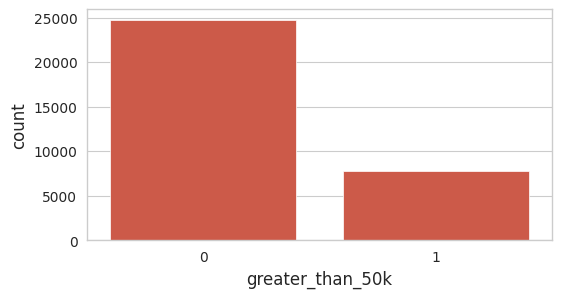

In [14]:
plt.figure(figsize=(6,3))
sns.countplot(x=target, data=df);

print('Porcentaje de Poblacon ingresos > 50K : %.2f' % (df[target].value_counts()[0] / len(df)))
print('Porcentaje de Poblacon ingresos <= 50K : %.2f' % (df[target].value_counts()[1] / len(df)))

## Analisis Univariado

### Categoricas

workclass
 Federal-gov           960
 Local-gov            2093
 Never-worked            7
 Private             22695
 Self-emp-inc         1116
 Self-emp-not-inc     2541
 State-gov            1298
 Without-pay            14
dtype: int64


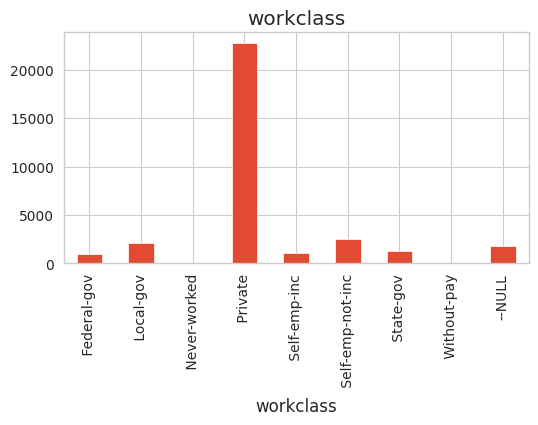

education
 10th              933
 11th             1175
 12th              433
 1st-4th           168
 5th-6th           333
 7th-8th           646
 9th               514
 Assoc-acdm       1067
 Assoc-voc        1382
 Bachelors        5355
 Doctorate         413
 HS-grad         10501
 Masters          1723
 Preschool          51
 Prof-school       576
 Some-college     7290
dtype: int64


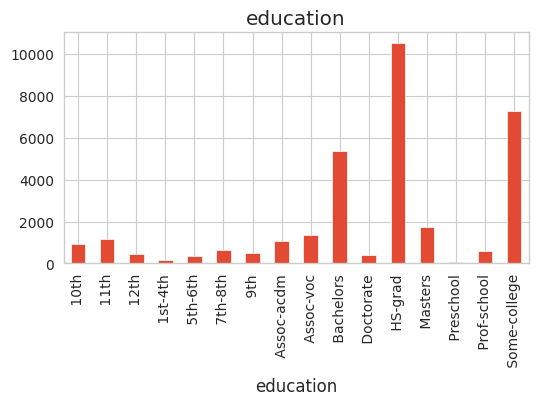

marital_status
 Divorced                  4443
 Married-AF-spouse           23
 Married-civ-spouse       14976
 Married-spouse-absent      418
 Never-married            10682
 Separated                 1025
 Widowed                    993
dtype: int64


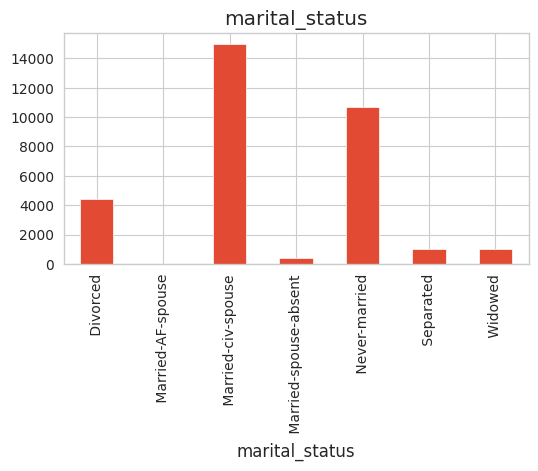

occupation
 Adm-clerical         3770
 Armed-Forces            9
 Craft-repair         4099
 Exec-managerial      4066
 Farming-fishing       994
 Handlers-cleaners    1370
 Machine-op-inspct    2001
 Other-service        3295
 Priv-house-serv       149
 Prof-specialty       4140
 Protective-serv       649
 Sales                3650
 Tech-support          928
 Transport-moving     1597
dtype: int64


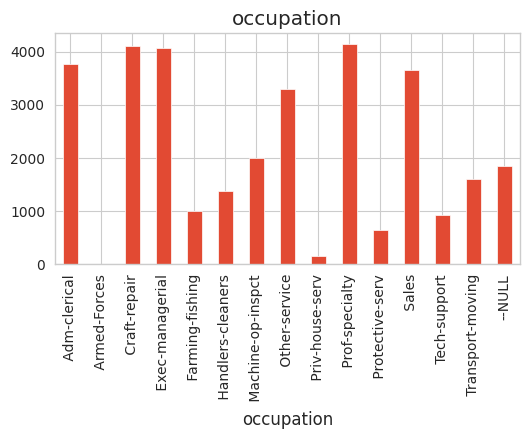

relationship
 Husband           13193
 Not-in-family      8305
 Other-relative      980
 Own-child          5068
 Unmarried          3446
 Wife               1568
dtype: int64


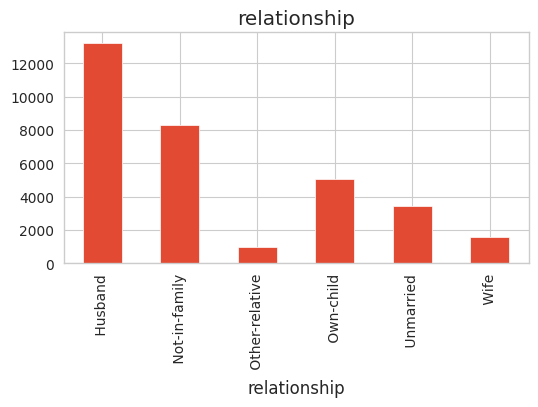

race
 Amer-Indian-Eskimo      311
 Asian-Pac-Islander     1039
 Black                  3124
 Other                   271
 White                 27815
dtype: int64


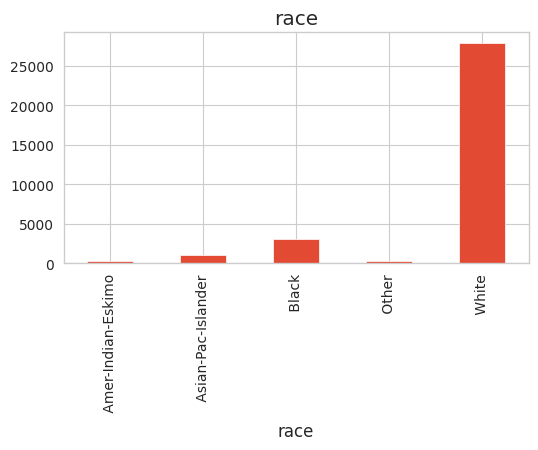

gender
 Female    10770
 Male      21790
dtype: int64


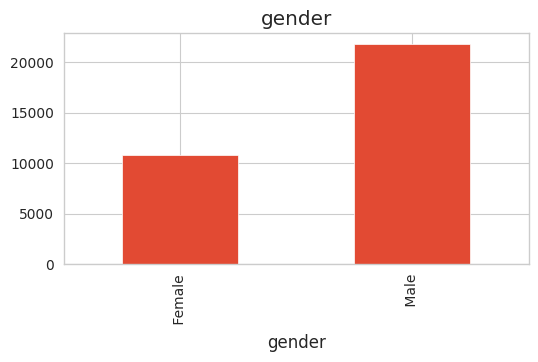

native_country
 Cambodia                         19
 Canada                          121
 China                            75
 Columbia                         59
 Cuba                             95
 Dominican-Republic               70
 Ecuador                          28
 El-Salvador                     106
 England                          90
 France                           29
 Germany                         137
 Greece                           29
 Guatemala                        64
 Haiti                            44
 Honduras                         13
 Hong                             20
 Hungary                          13
 India                           100
 Iran                             43
 Ireland                          24
 Italy                            73
 Jamaica                          81
 Japan                            62
 Laos                             18
 Mexico                          643
 Nicaragua                        34
 Outlying-US(Guam-USVI-

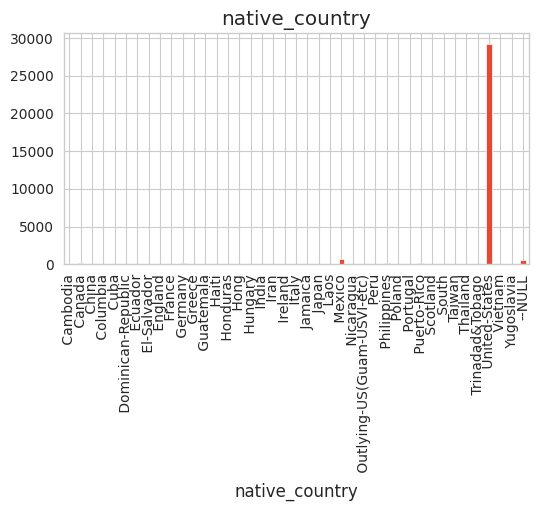

greater_than_50k
0    24719
1     7841
dtype: int64


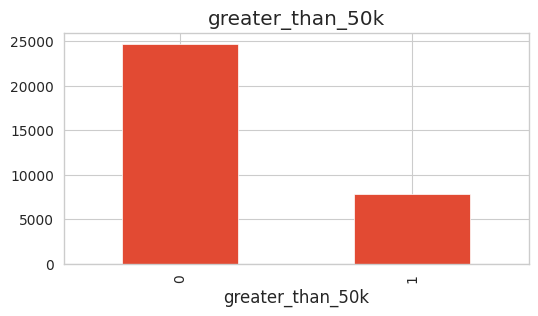

In [15]:
for x in columnsString:
  plt.figure(figsize=(6,3))
  print(df.groupby(x).size())
  plt.title(x)
  df.fillna("--NULL").groupby(x)[x].count().plot(kind = "bar")
  plt.show()

### Numericas

In [16]:
df[columnsNumeric].describe().T

,count,mean,std,min,25%,50%,75%,max
age,32560.0,38.581849,13.640593,17.0,28.0,37.0,48.0,90.0
education_num,32560.0,10.080682,2.572760,1.0,9.0,10.0,12.0,16.0
hours_per_week,32560.0,40.437469,12.347618,1.0,40.0,40.0,45.0,99.0


In [17]:
# df.groupby(target).median() # Mediana no se ve afectada con valores atípicos

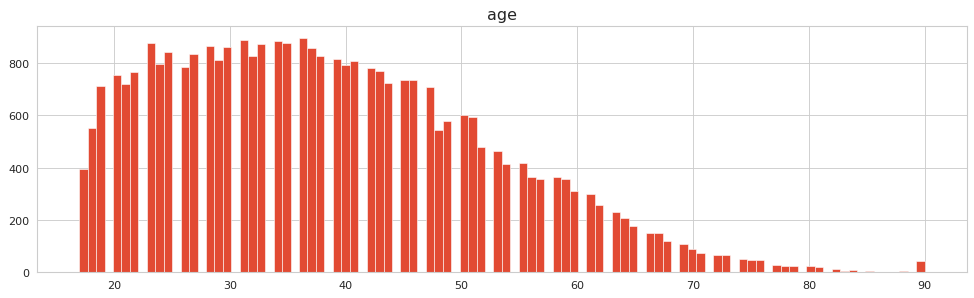

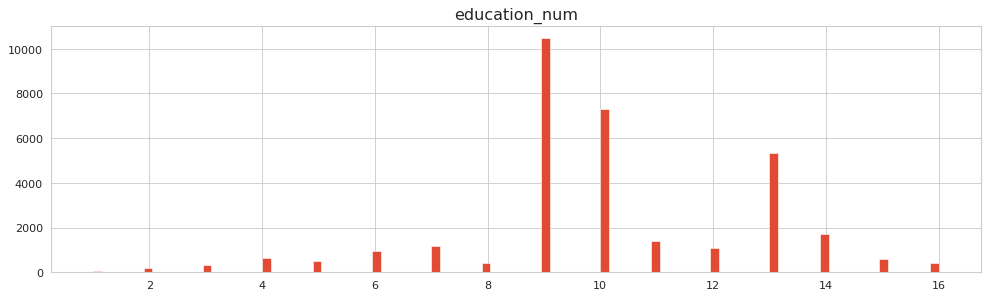

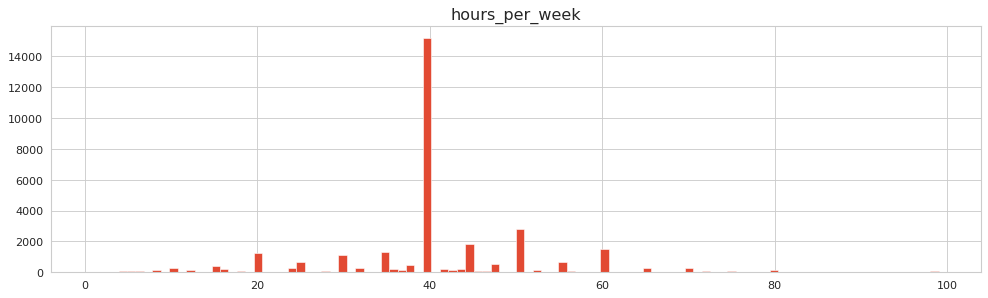

In [18]:
for x in columnsNumeric:
  plt.figure(figsize=(15,4), dpi=80)
  plt.title(df[x].name)
  plt.hist(df[x],bins=100)
  plt.show()

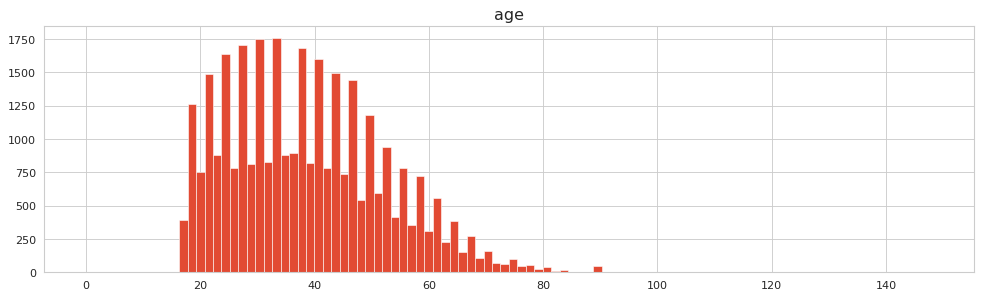

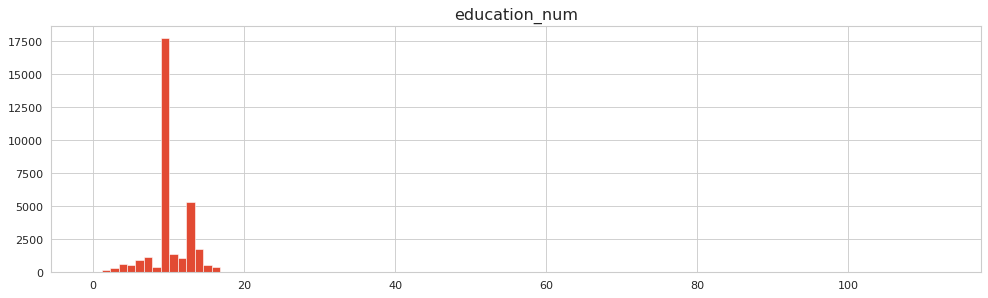

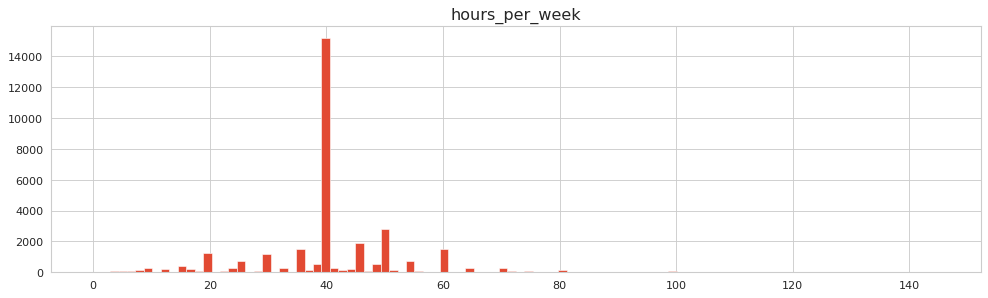

In [19]:
# No consideramos las colas (outliers) para ver mejor la distribucion
for x in columnsNumeric:
  plt.figure(figsize=(15,4), dpi=80)
  Q03= int(df[x].quantile(0.75))+100
  plt.title(df[x].name)
  plt.hist(df[x],bins=100,range=(0,Q03))
  plt.show()

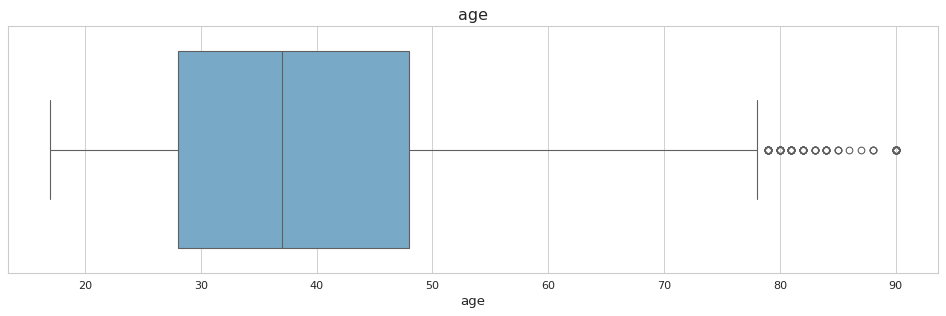

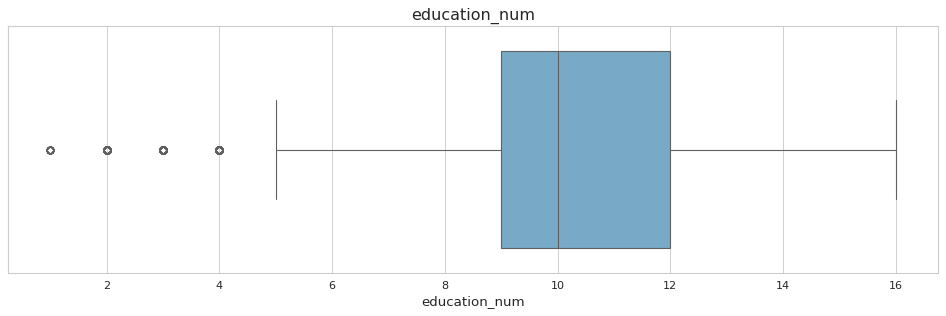

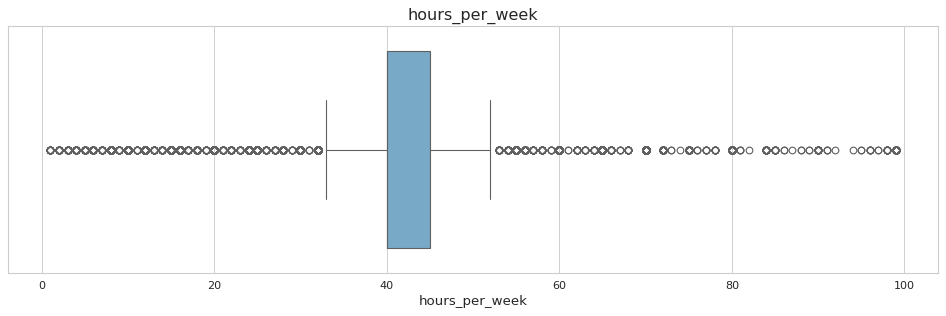

In [20]:
# Grafico de Cajas para revision de atipicos
for x in columnsNumeric:
  plt.figure(figsize=(15,4), dpi=80)
  plt.title(df[x].name)
  sns.boxplot(x=df[x], palette="Blues")
  plt.show()

## Anlisis Bivariado

### Categoricas

In [21]:
columnsString

['workclass',
 'education',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'gender',
 'native_country',
 'greater_than_50k']

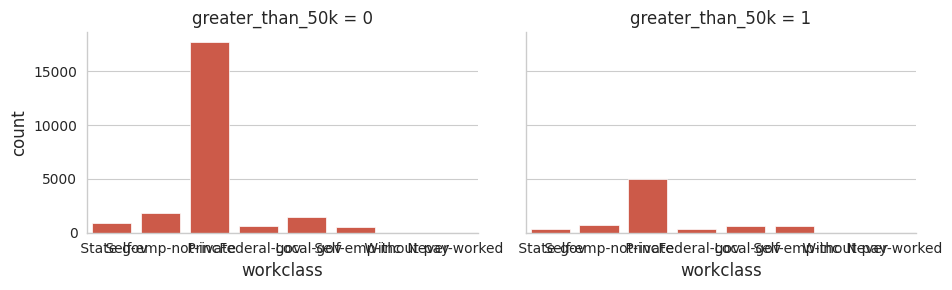

In [22]:
# workclass

grid = sns.FacetGrid(df,col=target, aspect=1.6)
grid.map(sns.countplot, 'workclass');

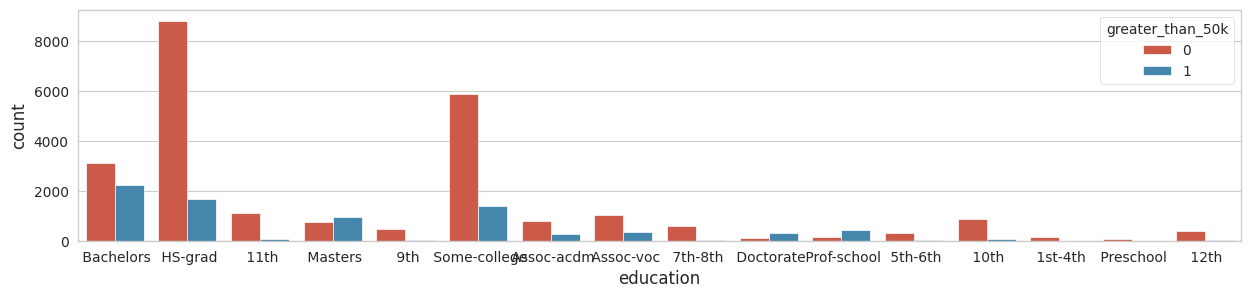

In [23]:
# education
plt.figure(figsize=(15,3))
sns.countplot(x='education', hue=target, data=df);

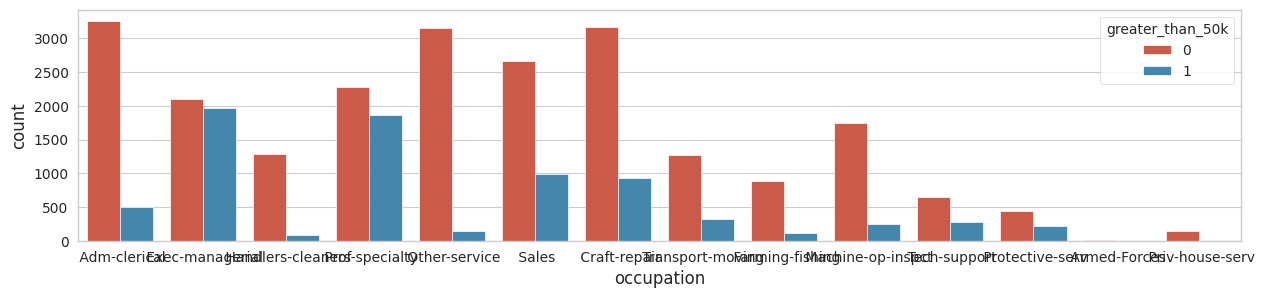

In [24]:
# occupation

plt.figure(figsize=(15,3))
sns.countplot(x='occupation', hue=target, data=df);

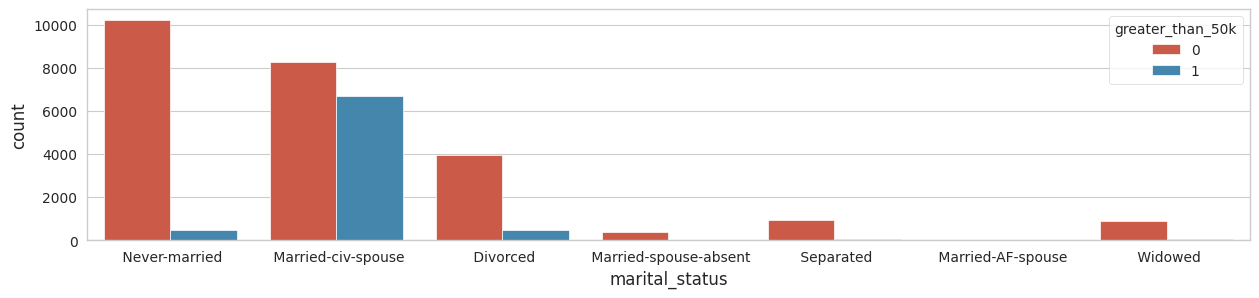

In [25]:
# marital_status

plt.figure(figsize=(15,3))
sns.countplot(x='marital_status', hue=target, data=df);

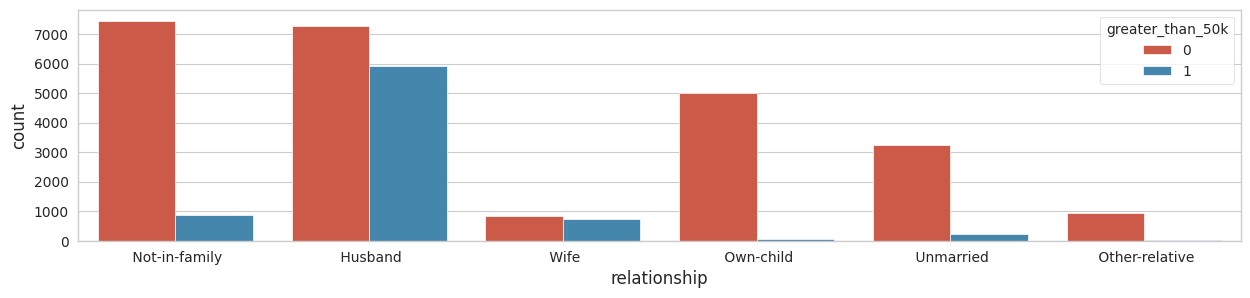

In [26]:
# relationship

plt.figure(figsize=(15,3))
sns.countplot(x='relationship', hue=target, data=df);

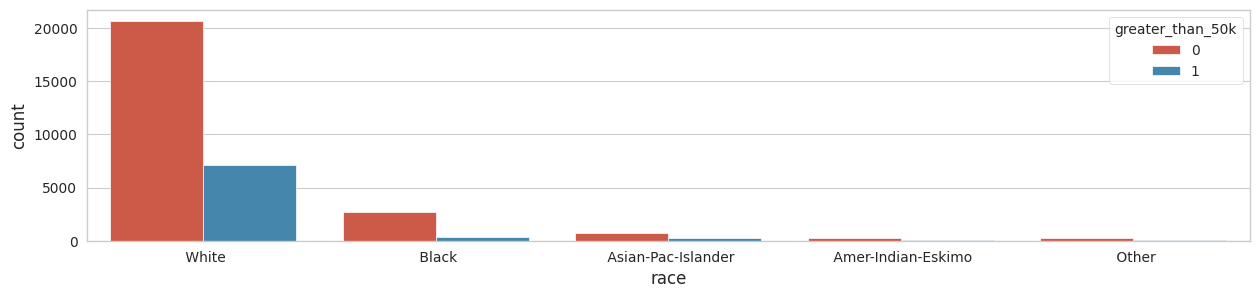

In [27]:
# race

plt.figure(figsize=(15,3))
sns.countplot(x='race', hue=target, data=df);

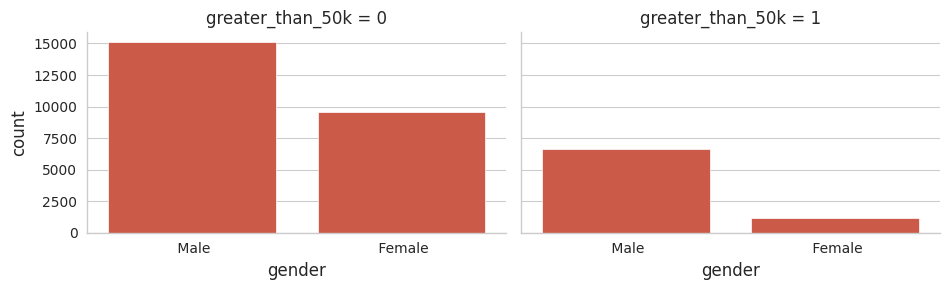

In [28]:
# gender

grid = sns.FacetGrid(df,col=target, aspect=1.6)
grid.map(sns.countplot, 'gender');

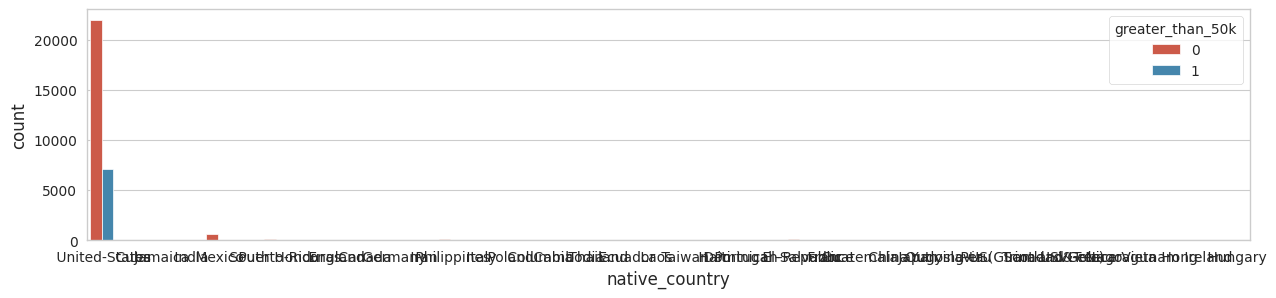

In [29]:
# native_country
plt.figure(figsize=(15,3))
sns.countplot(x='native_country', hue=target, data=df);

### Numericas

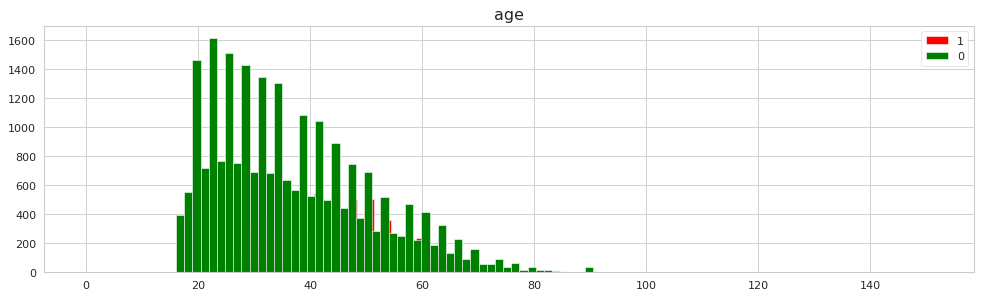

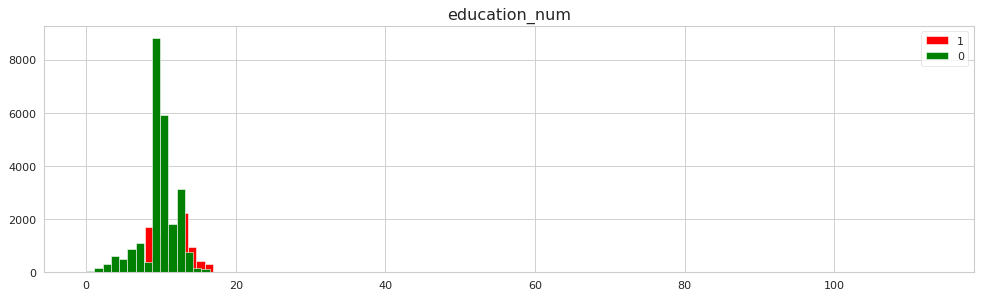

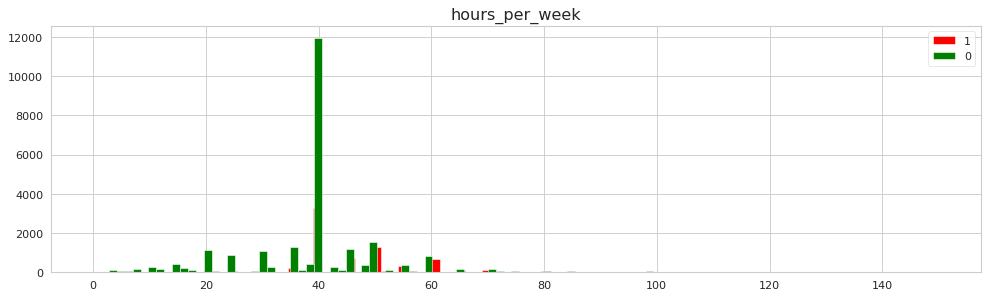

In [30]:
# Analizando variables numericas con respecto al target
for x in columnsNumeric:
  plt.figure(figsize=(15,4), dpi=80)
  x1 = df.loc[df[target]==1,x]  #Serie
  x2 = df.loc[df[target]==0,x]  #serie

  Q03x1 = int(pd.DataFrame(x1)[x].quantile(0.75))+100  # Q3 de la serie
  Q03x2 = int(pd.DataFrame(x2)[x].quantile(0.75))+100  # Q3 de la serie

  #se muestran las densidades
  plt.title(df[x].name)
  plt.hist(x1,bins=100,color='r',range=(0,Q03x1),label=1)
  plt.hist(x2,bins=100,color='g',range=(0,Q03x2),label=0)
  plt.legend()
  plt.show()

In [31]:
!pip install plotly

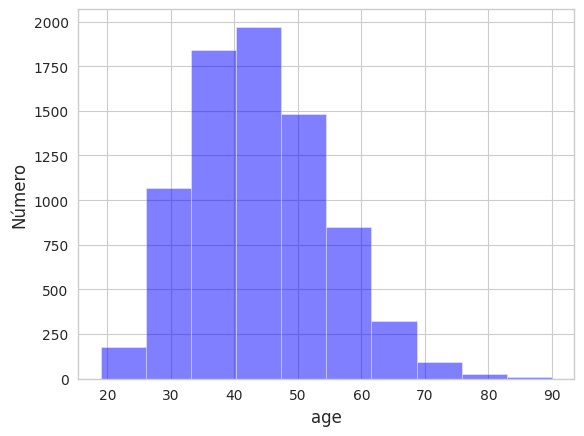

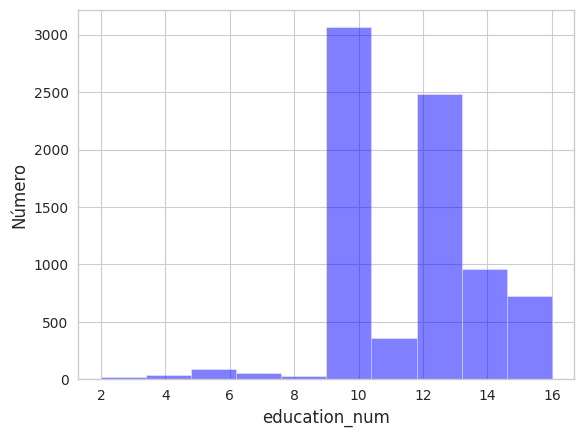

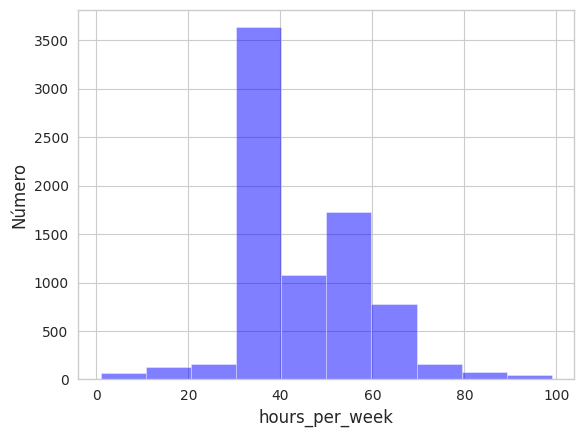

In [32]:
num_bins = 10
data_0 = df[df[target] == 1]

for i in columnsNumeric:
    n, bins, patches = plt.hist(data_0[i], num_bins, facecolor='blue', alpha=0.5)
    plt.xlabel(i)
    plt.ylabel('Número')
    plt.show()

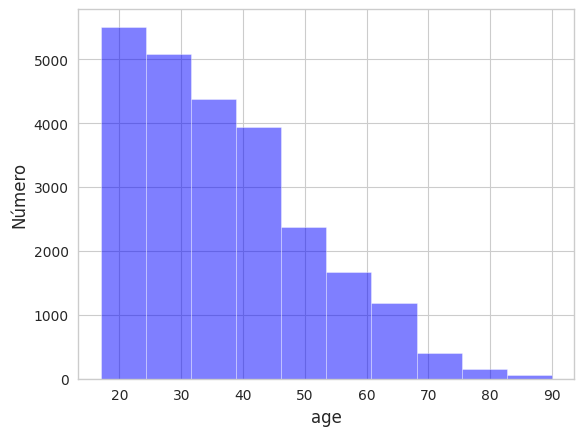

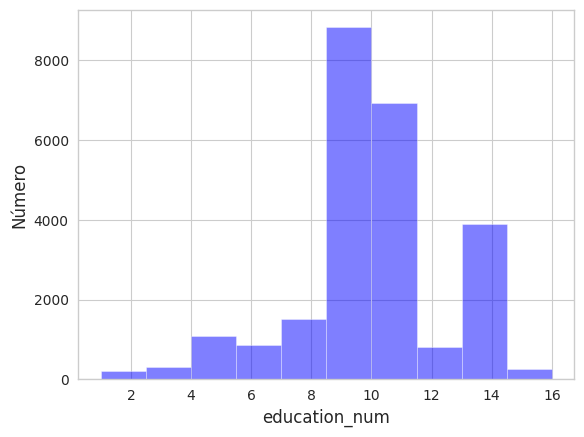

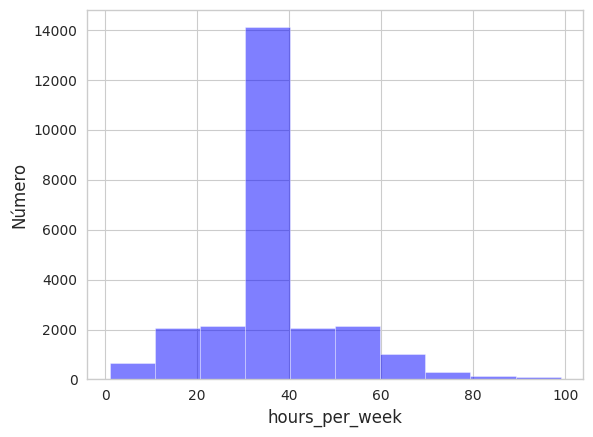

In [33]:
num_bins = 10
data_0 = df[df[target] == 0]

for i in columnsNumeric:
    n, bins, patches = plt.hist(data_0[i], num_bins, facecolor='blue', alpha=0.5)
    plt.xlabel(i)
    plt.ylabel('Número')
    plt.show()

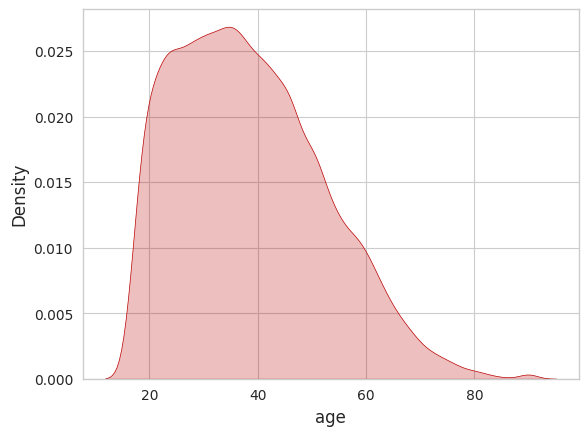

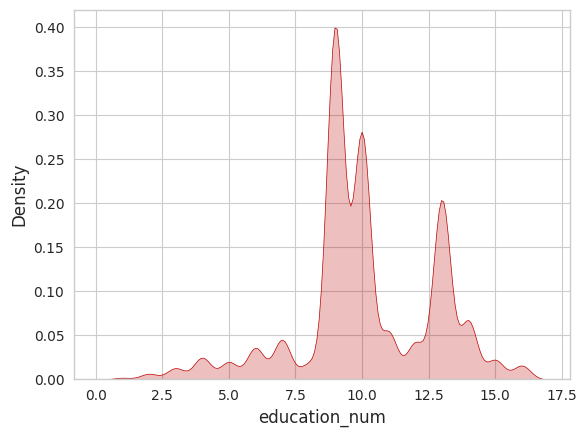

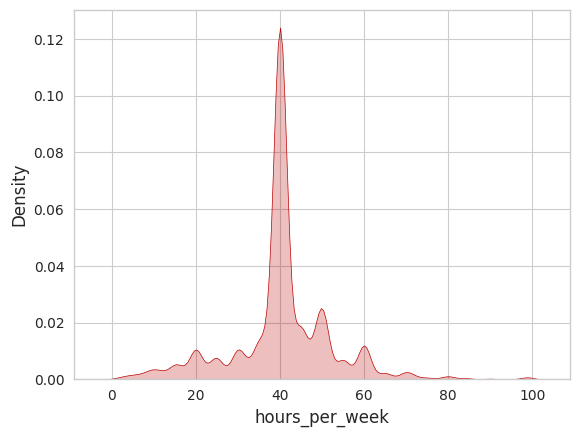

In [34]:
data_0 = df
for i in columnsNumeric:
    sns.kdeplot(data_0[i],shade = True,vertical = False,kernel = 'gau',cumulative = False,color = "#BB0000")
    plt.show()

In [35]:
from plotly.offline import download_plotlyjs, plot, iplot
from plotly.graph_objs import *

In [36]:
# gender de los que NO aceptan la campaña
geom_we = Histogram(x = df.query('greater_than_50k == 0')['gender'],
               marker = {'color': '#5555FF',
                         'line': {'color': '#FFFFFF',
                                  'width': 1},
                         'opacity': 0.6},
                   name = 'No Aceptan')

# gender de los que SI aceptan la campaña
geom_ee = Histogram(x = df.query('greater_than_50k == 1')['gender'],
               marker = {'color': '#55FF55',
                         'line': {'color': '#FFFFFF',
                                  'width': 1},
                         'opacity': 0.6},
                   name = 'Aceptan')

lay = Layout(
    title = 'gender No Aceptan vs gender Aceptan',
    barmode = 'overlay'
)

fig = Figure(data = [geom_we, geom_ee], layout = lay)

iplot(fig)

In [37]:
# Consumo Promedio Mensual de los que NO aceptan la campaña
geom_we = Histogram(x = df.query('greater_than_50k == 0')['race'],
               marker = {'color': '#5555FF',
                         'line': {'color': '#FFFFFF',
                                  'width': 1},
                         'opacity': 0.6},
                   name = 'No Aceptan')

# Consumo Promedio Mensual de los que SI aceptan la campaña
geom_ee = Histogram(x = df.query('greater_than_50k == 1')['race'],
               marker = {'color': '#55FF55',
                         'line': {'color': '#FFFFFF',
                                  'width': 1},
                         'opacity': 0.6},
                   name = 'Aceptan')

lay = Layout(
    title = 'race No Aceptan vs race Aceptan',
    barmode = 'overlay'
)

fig = Figure(data = [geom_we, geom_ee], layout = lay)

iplot(fig)

In [38]:
df_prub = df.copy()
df_prub['TARGET_LB'] = np.where(df_prub[target]==0,'N','Y')

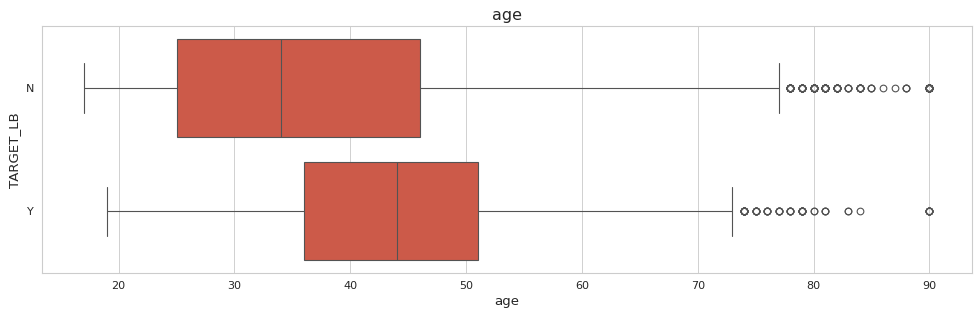

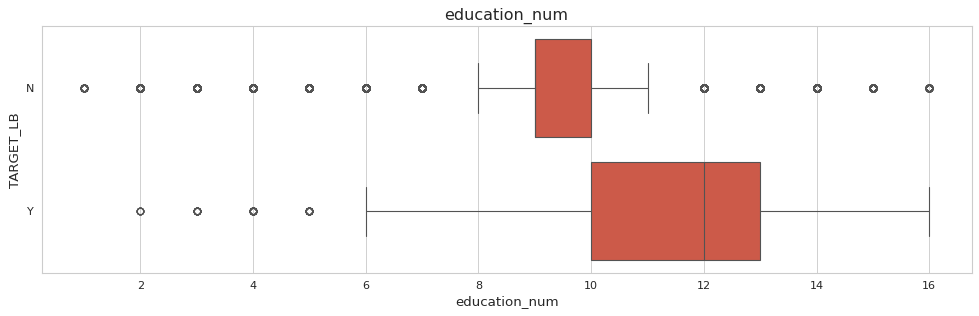

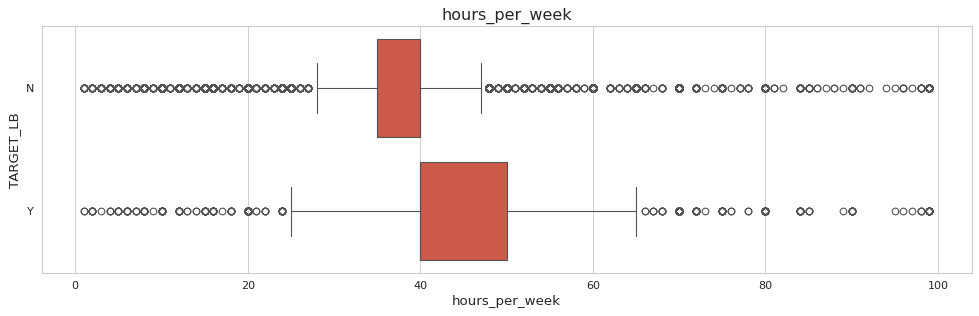

In [39]:
# Grafico de cajas respecto al target
for x in columnsNumeric:
  plt.figure(figsize=(15,4), dpi=80)
  plt.title(df_prub[x].name)
  sns.boxplot(x=df_prub[x],y=df_prub['TARGET_LB'])
  plt.show()

* Los que ganan más, se concentran entre los 35 a 55 años.
* Los que ganen menos se concentran entre los 20 y 30 años.
* Personas laboralmente independientes con empresa son los que ganan más, seguidos por los empleados de gobiernos federales.
* A mayor educación, mayores ingresos.
* Las personas casadas tienden a ganar más.
* Los hombres estan teniendo los salarios mas altos.
* Las personas de Francia, India, Iran y Taiwan son los de mayores ingresos.




## Analisis Multivariado

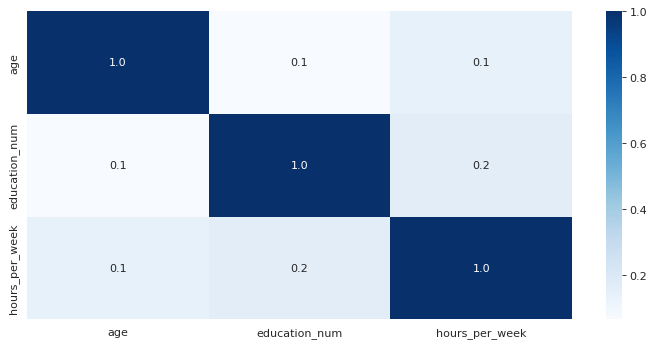

In [40]:
# Analizamos la correlacion de las variables
# Spearman: Para variables numericas. No asume normalidad
plt.figure(figsize=(11,5), dpi=80)
sns.heatmap(abs(df[columnsNumeric].corr(method='spearman')),annot=True,fmt='.1f',cmap='Blues')
plt.show()

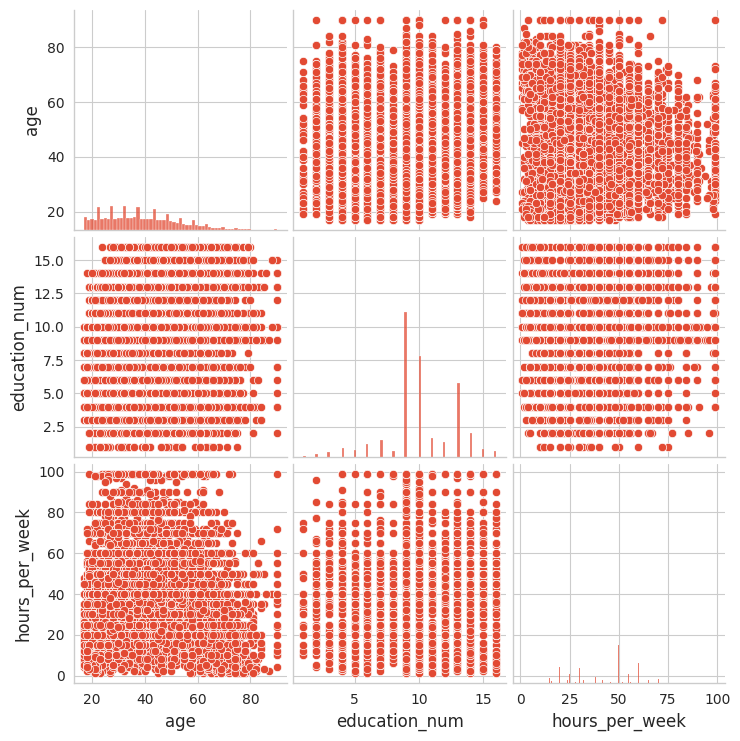

In [41]:
sns.pairplot(df[columnsNumeric])

## Asimetria

Calculamos el Coeficiente de Asimetría

In [42]:
from scipy import stats
import pandas as pd

In [43]:
data_ca = {'Variable' : columnsNumeric,
       'Coeficiente_Asim' : stats.skew(df[columnsNumeric])}
asim = pd.DataFrame(data_ca)
asim

,Variable,Coeficiente_Asim
0,age,0.558674
1,education_num,-0.311660
2,hours_per_week,0.227625


## Tratamiento de Nulos

In [44]:
df.isnull().sum().sort_values(ascending=False)

occupation          1843
workclass           1836
native_country       583
age                    0
education              0
education_num          0
marital_status         0
relationship           0
race                   0
gender                 0
hours_per_week         0
greater_than_50k       0
dtype: int64

In [45]:
df.isnull().sum()/df.shape[0]*100

age                 0.000000
workclass           5.638821
education           0.000000
education_num       0.000000
marital_status      0.000000
occupation          5.660319
relationship        0.000000
race                0.000000
gender              0.000000
hours_per_week      0.000000
native_country      1.790541
greater_than_50k    0.000000
dtype: float64

Se tienen valores perdidos, pero no es recomendable eliminar las variables Age ni Embarked ya que no representa el 20%

### Imputacion Univariada

In [46]:
print(len(columnsString))
print(len(columnsNumeric))
print(len(df.columns))

9
3
12


In [47]:
from sklearn.impute import SimpleImputer

In [48]:
#Imputacion Univariada Numerica
imp_univ_num = SimpleImputer(missing_values=np.nan,strategy='median')
#Iputacion univariada categorica
imp_univ_cat = SimpleImputer(missing_values=np.nan,strategy='most_frequent')

In [49]:
# Generamos los subset de variables a imputar
data_imp_cat = df[columnsString]
data_imp_num = df[columnsNumeric]

In [50]:
# Realizamos la imputacion univariada numerica
imp_univ_num.fit(data_imp_num)
imputed_data_univ_num = pd.DataFrame(data=imp_univ_num.transform(data_imp_num),
                                     columns=data_imp_num.columns,dtype='float')

# Realizamos la imputacion univariada categorica
imp_univ_cat.fit(data_imp_cat)
imputed_data_univ_cat = pd.DataFrame(data=imp_univ_cat.transform(data_imp_cat),
                                     columns=data_imp_cat.columns,dtype='object')

In [51]:
# validamos la imputacion numerica
imputed_data_univ_num.isnull().sum()

age               0
education_num     0
hours_per_week    0
dtype: int64

In [52]:
# validamos la imputacion categorica
imputed_data_univ_cat.isnull().sum()

workclass           0
education           0
marital_status      0
occupation          0
relationship        0
race                0
gender              0
native_country      0
greater_than_50k    0
dtype: int64

In [53]:
# Consolidamos el dataset
df = pd.concat([imputed_data_univ_num,imputed_data_univ_cat,],axis=1)
print(df.shape)
df.head(3)

(32560, 12)


,age,education_num,hours_per_week,workclass,education,marital_status,occupation,relationship,race,gender,native_country,greater_than_50k
0,39.0,13.0,40.0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,0
1,50.0,13.0,13.0,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,0
2,38.0,9.0,40.0,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,0


In [54]:
df.isnull().sum().sort_values(ascending=False)

age                 0
education_num       0
hours_per_week      0
workclass           0
education           0
marital_status      0
occupation          0
relationship        0
race                0
gender              0
native_country      0
greater_than_50k    0
dtype: int64

# **II. Recodificacion Data**

In [55]:
columnsCat = ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'gender', 'native_country']

In [56]:
# Creamos 2 dataset de variables categoricas!
df_categoricas_00 = df[columnsCat]
df_categoricas_01 = df[columnsCat]
df_categoricas_02 = df[columnsCat]
df_categoricas_03 = df[columnsCat]

## LabelEncoder

In [57]:
from sklearn.preprocessing import LabelEncoder

In [58]:
for c in df_categoricas_00:
    print(str(c))
    le = LabelEncoder()
    le.fit(df_categoricas_00[str(c)])
    df_categoricas_00[str(c)]=le.transform(df_categoricas_00[str(c)])

workclass
education
marital_status
occupation
relationship
race
gender
native_country


In [59]:
print(df_categoricas_00.shape)
df_categoricas_00.head(3)

(32560, 8)


,workclass,education,marital_status,occupation,relationship,race,gender,native_country
0,6,9,4,0,1,4,1,37
1,5,9,2,3,0,4,1,37
2,3,11,0,5,1,4,1,37


### Juntar Bases

In [60]:
df2_v1 = pd.concat([df[columnsNumeric],df_categoricas_00,df['greater_than_50k']],axis=1)
print(df2_v1.shape)
df2_v1.head(3)

(32560, 12)


,age,education_num,hours_per_week,workclass,education,marital_status,occupation,relationship,race,gender,native_country,greater_than_50k
0,39.0,13.0,40.0,6,9,4,0,1,4,1,37,0
1,50.0,13.0,13.0,5,9,2,3,0,4,1,37,0
2,38.0,9.0,40.0,3,11,0,5,1,4,1,37,0


In [61]:
# Se limpia el nombre de las variables
df2_v1.columns = df2_v1.columns.str.replace(r'\W+', '_', regex=True)

In [62]:
df2_v1=df2_v1.reset_index(drop=True)

## OneHotEncoder

In [63]:
from sklearn.preprocessing import OneHotEncoder

In [64]:
encoder = OneHotEncoder()
encoded_data = encoder.fit_transform(df_categoricas_01[columnsCat])
df_categoricas_04 = pd.DataFrame(encoded_data.toarray(), columns=encoder.get_feature_names_out(columnsCat))

In [65]:
print(df_categoricas_04.shape)
df_categoricas_04.head(3)

(32560, 98)


,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,education_ 10th,education_ 11th,education_ 12th,education_ 1st-4th,education_ 5th-6th,education_ 7th-8th,education_ 9th,education_ Assoc-acdm,education_ Assoc-voc,education_ Bachelors,education_ Doctorate,education_ HS-grad,education_ Masters,education_ Preschool,education_ Prof-school,education_ Some-college,marital_status_ Divorced,marital_status_ Married-AF-spouse,marital_status_ Married-civ-spouse,marital_status_ Married-spouse-absent,marital_status_ Never-married,marital_status_ Separated,marital_status_ Widowed,occupation_ Adm-clerical,occupation_ Armed-Forces,occupation_ Craft-repair,occupation_ Exec-managerial,occupation_ Farming-fishing,occupation_ Handlers-cleaners,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,relationship_ Husband,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,gender_ Female,gender_ Male,native_country_ Cambodia,native_country_ Canada,native_country_ China,native_country_ Columbia,native_country_ Cuba,native_country_ Dominican-Republic,native_country_ Ecuador,native_country_ El-Salvador,native_country_ England,native_country_ France,native_country_ Germany,native_country_ Greece,native_country_ Guatemala,native_country_ Haiti,native_country_ Honduras,native_country_ Hong,native_country_ Hungary,native_country_ India,native_country_ Iran,native_country_ Ireland,native_country_ Italy,native_country_ Jamaica,native_country_ Japan,native_country_ Laos,native_country_ Mexico,native_country_ Nicaragua,native_country_ Outlying-US(Guam-USVI-etc),native_country_ Peru,native_country_ Philippines,native_country_ Poland,native_country_ Portugal,native_country_ Puerto-Rico,native_country_ Scotland,native_country_ South,native_country_ Taiwan,native_country_ Thailand,native_country_ Trinadad&Tobago,native_country_ United-States,native_country_ Vietnam,native_country_ Yugoslavia
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


### Juntar Bases

In [66]:
df2_v2 = pd.concat([df[columnsNumeric],df_categoricas_04,df['greater_than_50k']],axis=1)
print(df2_v2.shape)
df2_v2.head(3)

(32560, 102)


,age,education_num,hours_per_week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,education_ 10th,education_ 11th,education_ 12th,education_ 1st-4th,education_ 5th-6th,education_ 7th-8th,education_ 9th,education_ Assoc-acdm,education_ Assoc-voc,education_ Bachelors,education_ Doctorate,education_ HS-grad,education_ Masters,education_ Preschool,education_ Prof-school,education_ Some-college,marital_status_ Divorced,marital_status_ Married-AF-spouse,marital_status_ Married-civ-spouse,marital_status_ Married-spouse-absent,marital_status_ Never-married,marital_status_ Separated,marital_status_ Widowed,occupation_ Adm-clerical,occupation_ Armed-Forces,occupation_ Craft-repair,occupation_ Exec-managerial,occupation_ Farming-fishing,occupation_ Handlers-cleaners,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,relationship_ Husband,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,gender_ Female,gender_ Male,native_country_ Cambodia,native_country_ Canada,native_country_ China,native_country_ Columbia,native_country_ Cuba,native_country_ Dominican-Republic,native_country_ Ecuador,native_country_ El-Salvador,native_country_ England,native_country_ France,native_country_ Germany,native_country_ Greece,native_country_ Guatemala,native_country_ Haiti,native_country_ Honduras,native_country_ Hong,native_country_ Hungary,native_country_ India,native_country_ Iran,native_country_ Ireland,native_country_ Italy,native_country_ Jamaica,native_country_ Japan,native_country_ Laos,native_country_ Mexico,native_country_ Nicaragua,native_country_ Outlying-US(Guam-USVI-etc),native_country_ Peru,native_country_ Philippines,native_country_ Poland,native_country_ Portugal,native_country_ Puerto-Rico,native_country_ Scotland,native_country_ South,native_country_ Taiwan,native_country_ Thailand,native_country_ Trinadad&Tobago,native_country_ United-States,native_country_ Vietnam,native_country_ Yugoslavia,greater_than_50k
0,39.0,13.0,40.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
1,50.0,13.0,13.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
2,38.0,9.0,40.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0


In [67]:
# Se actualiza el tipo de dato
columnas_uint8 = df2_v2.select_dtypes(include='uint8').columns.tolist()
for columna in columnas_uint8:
    df2_v2[columna] = df2_v2[columna].astype('int')

In [68]:
# Se limpia el nombre de las variables
df2_v2.columns = df2_v2.columns.str.replace(r'\W+', '_', regex=True)

In [69]:
df2_v2=df2_v2.reset_index(drop=True)

## GetDummies

In [70]:
# Preprocesamiento con OneHotEncoder
df_categoricas_05 = pd.get_dummies(df_categoricas_02)

In [71]:
print(df_categoricas_05.shape)
df_categoricas_05.head(3)

(32560, 98)


,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,education_ 10th,education_ 11th,education_ 12th,education_ 1st-4th,education_ 5th-6th,education_ 7th-8th,education_ 9th,education_ Assoc-acdm,education_ Assoc-voc,education_ Bachelors,education_ Doctorate,education_ HS-grad,education_ Masters,education_ Preschool,education_ Prof-school,education_ Some-college,marital_status_ Divorced,marital_status_ Married-AF-spouse,marital_status_ Married-civ-spouse,marital_status_ Married-spouse-absent,marital_status_ Never-married,marital_status_ Separated,marital_status_ Widowed,occupation_ Adm-clerical,occupation_ Armed-Forces,occupation_ Craft-repair,occupation_ Exec-managerial,occupation_ Farming-fishing,occupation_ Handlers-cleaners,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,relationship_ Husband,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,gender_ Female,gender_ Male,native_country_ Cambodia,native_country_ Canada,native_country_ China,native_country_ Columbia,native_country_ Cuba,native_country_ Dominican-Republic,native_country_ Ecuador,native_country_ El-Salvador,native_country_ England,native_country_ France,native_country_ Germany,native_country_ Greece,native_country_ Guatemala,native_country_ Haiti,native_country_ Honduras,native_country_ Hong,native_country_ Hungary,native_country_ India,native_country_ Iran,native_country_ Ireland,native_country_ Italy,native_country_ Jamaica,native_country_ Japan,native_country_ Laos,native_country_ Mexico,native_country_ Nicaragua,native_country_ Outlying-US(Guam-USVI-etc),native_country_ Peru,native_country_ Philippines,native_country_ Poland,native_country_ Portugal,native_country_ Puerto-Rico,native_country_ Scotland,native_country_ South,native_country_ Taiwan,native_country_ Thailand,native_country_ Trinadad&Tobago,native_country_ United-States,native_country_ Vietnam,native_country_ Yugoslavia
0,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
1,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
2,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Fa

### Juntar Bases

In [72]:
df2_v3 = pd.concat([df[columnsNumeric],df_categoricas_05,df['greater_than_50k']],axis=1)
print(df2_v3.shape)
df2_v3.head(3)

(32560, 102)


,age,education_num,hours_per_week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,education_ 10th,education_ 11th,education_ 12th,education_ 1st-4th,education_ 5th-6th,education_ 7th-8th,education_ 9th,education_ Assoc-acdm,education_ Assoc-voc,education_ Bachelors,education_ Doctorate,education_ HS-grad,education_ Masters,education_ Preschool,education_ Prof-school,education_ Some-college,marital_status_ Divorced,marital_status_ Married-AF-spouse,marital_status_ Married-civ-spouse,marital_status_ Married-spouse-absent,marital_status_ Never-married,marital_status_ Separated,marital_status_ Widowed,occupation_ Adm-clerical,occupation_ Armed-Forces,occupation_ Craft-repair,occupation_ Exec-managerial,occupation_ Farming-fishing,occupation_ Handlers-cleaners,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,relationship_ Husband,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,gender_ Female,gender_ Male,native_country_ Cambodia,native_country_ Canada,native_country_ China,native_country_ Columbia,native_country_ Cuba,native_country_ Dominican-Republic,native_country_ Ecuador,native_country_ El-Salvador,native_country_ England,native_country_ France,native_country_ Germany,native_country_ Greece,native_country_ Guatemala,native_country_ Haiti,native_country_ Honduras,native_country_ Hong,native_country_ Hungary,native_country_ India,native_country_ Iran,native_country_ Ireland,native_country_ Italy,native_country_ Jamaica,native_country_ Japan,native_country_ Laos,native_country_ Mexico,native_country_ Nicaragua,native_country_ Outlying-US(Guam-USVI-etc),native_country_ Peru,native_country_ Philippines,native_country_ Poland,native_country_ Portugal,native_country_ Puerto-Rico,native_country_ Scotland,native_country_ South,native_country_ Taiwan,native_country_ Thailand,native_country_ Trinadad&Tobago,native_country_ United-States,native_country_ Vietnam,native_country_ Yugoslavia,greater_than_50k
0,39.0,13.0,40.0,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,0
1,50.0,13.0,13.0,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,0
2,38.0,9.0,40.0,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,

In [73]:
# Se actualiza el tipo de dato
columnas_uint8 = df2_v3.select_dtypes(include='uint8').columns.tolist()
for columna in columnas_uint8:
    df2_v3[columna] = df2_v3[columna].astype('int')

In [74]:
# Se limpia el nombre de las variables
df2_v3.columns = df2_v3.columns.str.replace(r'\W+', '_', regex=True)

In [75]:
df2_v3=df2_v3.reset_index(drop=True)

## GetDummies 2

In [76]:
workclass_dummies = pd.get_dummies(df_categoricas_03.workclass, prefix='Wkc_')
workclass_dummies.drop(workclass_dummies.columns[0],axis=1,inplace=True)

educ_dummies = pd.get_dummies(df_categoricas_03.education, prefix='educ_')
educ_dummies.drop(educ_dummies.columns[0],axis=1,inplace=True)

ms_dummies = pd.get_dummies(df_categoricas_03.marital_status, prefix='ms_')
ms_dummies.drop(ms_dummies.columns[0],axis=1,inplace=True)

oc_dummies = pd.get_dummies(df_categoricas_03.occupation, prefix='oc_')
oc_dummies.drop(oc_dummies.columns[0],axis=1,inplace=True)

rs_dummies = pd.get_dummies(df_categoricas_03.relationship, prefix='rs_')
rs_dummies.drop(rs_dummies.columns[0],axis=1,inplace=True)

race_dummies = pd.get_dummies(df_categoricas_03.race, prefix='race_')
race_dummies.drop(race_dummies.columns[0],axis=1,inplace=True)

gender_dummies = pd.get_dummies(df_categoricas_03.gender, prefix='gender_')
gender_dummies.drop(gender_dummies.columns[0],axis=1,inplace=True)

country_dummies = pd.get_dummies(df_categoricas_03.native_country, prefix='nc_')
country_dummies.drop(country_dummies.columns[0],axis=1,inplace=True)

### Juntar Bases

In [77]:
df2_v4 = pd.concat([df[columnsNumeric],workclass_dummies,educ_dummies,ms_dummies,oc_dummies,rs_dummies,race_dummies,gender_dummies,country_dummies,df['greater_than_50k']],axis=1)
print(df2_v4.shape)
df2_v4.head(3)

(32560, 94)


,age,education_num,hours_per_week,Wkc__ Local-gov,Wkc__ Never-worked,Wkc__ Private,Wkc__ Self-emp-inc,Wkc__ Self-emp-not-inc,Wkc__ State-gov,Wkc__ Without-pay,educ__ 11th,educ__ 12th,educ__ 1st-4th,educ__ 5th-6th,educ__ 7th-8th,educ__ 9th,educ__ Assoc-acdm,educ__ Assoc-voc,educ__ Bachelors,educ__ Doctorate,educ__ HS-grad,educ__ Masters,educ__ Preschool,educ__ Prof-school,educ__ Some-college,ms__ Married-AF-spouse,ms__ Married-civ-spouse,ms__ Married-spouse-absent,ms__ Never-married,ms__ Separated,ms__ Widowed,oc__ Armed-Forces,oc__ Craft-repair,oc__ Exec-managerial,oc__ Farming-fishing,oc__ Handlers-cleaners,oc__ Machine-op-inspct,oc__ Other-service,oc__ Priv-house-serv,oc__ Prof-specialty,oc__ Protective-serv,oc__ Sales,oc__ Tech-support,oc__ Transport-moving,rs__ Not-in-family,rs__ Other-relative,rs__ Own-child,rs__ Unmarried,rs__ Wife,race__ Asian-Pac-Islander,race__ Black,race__ Other,race__ White,gender__ Male,nc__ Canada,nc__ China,nc__ Columbia,nc__ Cuba,nc__ Dominican-Republic,nc__ Ecuador,nc__ El-Salvador,nc__ England,nc__ France,nc__ Germany,nc__ Greece,nc__ Guatemala,nc__ Haiti,nc__ Honduras,nc__ Hong,nc__ Hungary,nc__ India,nc__ Iran,nc__ Ireland,nc__ Italy,nc__ Jamaica,nc__ Japan,nc__ Laos,nc__ Mexico,nc__ Nicaragua,nc__ Outlying-US(Guam-USVI-etc),nc__ Peru,nc__ Philippines,nc__ Poland,nc__ Portugal,nc__ Puerto-Rico,nc__ Scotland,nc__ South,nc__ Taiwan,nc__ Thailand,nc__ Trinadad&Tobago,nc__ United-States,nc__ Vietnam,nc__ Yugoslavia,greater_than_50k
0,39.0,13.0,40.0,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,0
1,50.0,13.0,13.0,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,0
2,38.0,9.0,40.0,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,0


In [78]:
# Se actualiza el tipo de dato
columnas_uint8 = df2_v4.select_dtypes(include='uint8').columns.tolist()
for columna in columnas_uint8:
    df2_v4[columna] = df2_v4[columna].astype('int')

In [79]:
# Se limpia el nombre de las variables
df2_v4.columns = df2_v4.columns.str.replace(r'\W+', '_', regex=True)

In [80]:
df2_v4=df2_v4.reset_index(drop=True)

# **IV. Modelado**

In [81]:
df_modelo_prev = df2_v1.copy()

In [82]:
data_0 = df_modelo_prev[df_modelo_prev[target] == 0]
data_0['target'] = 0
data_1 = df_modelo_prev[df_modelo_prev[target] == 1]
data_1['target'] = 1

In [83]:
df_modelo = pd.concat([data_0, data_1], ignore_index=True)
df_modelo = df_modelo.drop('greater_than_50k',axis=1)

In [84]:
print(df_modelo.shape)
df_modelo.head(3)

(32560, 12)


,age,education_num,hours_per_week,workclass,education,marital_status,occupation,relationship,race,gender,native_country,target
0,39.0,13.0,40.0,6,9,4,0,1,4,1,37,0
1,50.0,13.0,13.0,5,9,2,3,0,4,1,37,0
2,38.0,9.0,40.0,3,11,0,5,1,4,1,37,0


In [85]:
df_modelo.dtypes

age               float64
education_num     float64
hours_per_week    float64
workclass           int64
education           int64
marital_status      int64
occupation          int64
relationship        int64
race                int64
gender              int64
native_country      int64
target              int64
dtype: object

In [86]:
df_modelo['target'].value_counts()

target
0    24719
1     7841
Name: count, dtype: int64

In [87]:
# Separación de predictoras y predicha
X = df_modelo.drop('target',axis=1) # Features o Covariables.
y = df_modelo.target                # Target u Objetivo

## Particion Muestral

In [88]:
from sklearn.model_selection import train_test_split

In [89]:
#Creación de muestras de train y test
X_train, X_test, y_train, y_test = train_test_split(X,  # Covariables
                                                    y,  # Target
                                                    test_size=0.33, # % test
                                                    stratify=y,     # Estratificar!
                                                    random_state=2021)

In [90]:
#X_train, X_test, y_train, y_test = train_test_split(df_modelo.iloc[:,:-1],df_modelo.iloc[:,-1], test_size = 0.3, random_state = 100)

In [91]:
print('X_train shape', X_train.shape)
print('y_train shape', y_train.shape)
print('X_test shape', X_test.shape)
print('y_test shape', y_test.shape)

X_train shape (21815, 11)
y_train shape (21815,)
X_test shape (10745, 11)
y_test shape (10745,)


In [92]:
# Distribucion real del target!
df_modelo.target.value_counts()/df_modelo.shape[0]*100

target
0    75.918305
1    24.081695
Name: count, dtype: float64

In [93]:
# Distribucion del target de entrenamiento!
y_train.value_counts()/y_train.shape[0]*100

target
0    75.920238
1    24.079762
Name: count, dtype: float64

In [94]:
# Distribucion del target de prueba!
y_test.value_counts()/y_test.shape[0]*100

target
0    75.914379
1    24.085621
Name: count, dtype: float64

## Arbol Clasificacion

In [95]:
X_train.head(3)

,age,education_num,hours_per_week,workclass,education,marital_status,occupation,relationship,race,gender,native_country
12204,54.0,15.0,65.0,3,14,4,9,2,4,0,37
13088,25.0,13.0,40.0,3,9,4,12,3,4,0,37
30159,33.0,10.0,30.0,3,15,4,0,3,4,0,37


In [96]:
y_train

12204    0
13088    0
30159    1
28892    1
13221    0
        ..
4788     0
321      0
5644     0
10882    0
7822     0
Name: target, Length: 21815, dtype: int64

In [97]:
from sklearn.tree import DecisionTreeClassifier

In [98]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train,y_train)

DecisionTreeClassifier()

In [99]:
from sklearn import metrics

In [100]:
dt_model.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [101]:
y_pred_train = dt_model.predict(X_train)
y_pred_test = dt_model.predict(X_test)

In [102]:
# Paso N°03: Revisamos las metricas de validacion técnicas adecuadas!

# Matriz de confusion
print("Matriz confusion: Train")
cm_train = metrics.confusion_matrix(y_train,y_pred_train)
print(cm_train)

print("Matriz confusion: Test")
cm_test = metrics.confusion_matrix(y_test,y_pred_test)
print(cm_test)

# Accuracy
print("Accuracy: Train")
accuracy_train=metrics.accuracy_score(y_train,y_pred_train)
print(accuracy_train)

print("Accuracy: Test")
accuracy_test=metrics.accuracy_score(y_test,y_pred_test)
print(accuracy_test)

# Precision o Aporte del Modelo
print("Precision: Train")
precision_train=metrics.precision_score(y_train,y_pred_train)
print(precision_train)

print("Precision: Test")
precision_test=metrics.precision_score(y_test,y_pred_test)
print(precision_test)

# Recall o Sensibilidad
print("Recall: Train")
recall_train=metrics.recall_score(y_train,y_pred_train)
print(recall_train)

print("Recall: Test")
recall_test=metrics.recall_score(y_test,y_pred_test)
print(recall_test)

Matriz confusion: Train
[[16464    98]
 [  494  4759]]
Matriz confusion: Test
[[7072 1085]
 [1244 1344]]
Accuracy: Train
0.9728627091450837
Accuracy: Test
0.7832480223359702
Precision: Train
0.979822935968705
Precision: Test
0.553314121037464
Recall: Train
0.9059584999048163
Recall: Test
0.5193199381761978


In [103]:
#Importancia de variables
dt_model.feature_importances_

array([0.22236416, 0.14904037, 0.13026103, 0.0713147 , 0.02104071,
       0.01492755, 0.10504227, 0.2318942 , 0.02523789, 0.00658599,
       0.02229113])

In [104]:
pd.Series(data=dt_model.feature_importances_, index=X_train.columns)

age               0.222364
education_num     0.149040
hours_per_week    0.130261
workclass         0.071315
education         0.021041
marital_status    0.014928
occupation        0.105042
relationship      0.231894
race              0.025238
gender            0.006586
native_country    0.022291
dtype: float64

In [105]:
print(metrics.classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.85      0.87      0.86      8157
           1       0.55      0.52      0.54      2588

    accuracy                           0.78     10745
   macro avg       0.70      0.69      0.70     10745
weighted avg       0.78      0.78      0.78     10745



## Arbol 2

In [106]:
clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100,max_depth=3, min_samples_leaf=5)

clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, random_state=100)

In [107]:
clf_gini.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 5,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 100,
 'splitter': 'best'}

In [108]:
y_pred_train = clf_gini.predict(X_train)
y_pred_test = clf_gini.predict(X_test)

In [109]:
# Paso N°03: Revisamos las metricas de validacion técnicas adecuadas!

# Matriz de confusion
print("Matriz confusion: Train")
cm_train = metrics.confusion_matrix(y_train,y_pred_train)
print(cm_train)

print("Matriz confusion: Test")
cm_test = metrics.confusion_matrix(y_test,y_pred_test)
print(cm_test)

# Accuracy
print("Accuracy: Train")
accuracy_train=metrics.accuracy_score(y_train,y_pred_train)
print(accuracy_train)

print("Accuracy: Test")
accuracy_test=metrics.accuracy_score(y_test,y_pred_test)
print(accuracy_test)

# Precision o Aporte del Modelo
print("Precision: Train")
precision_train=metrics.precision_score(y_train,y_pred_train)
print(precision_train)

print("Precision: Test")
precision_test=metrics.precision_score(y_test,y_pred_test)
print(precision_test)

# Recall o Sensibilidad
print("Recall: Train")
recall_train=metrics.recall_score(y_train,y_pred_train)
print(recall_train)

print("Recall: Test")
recall_test=metrics.recall_score(y_test,y_pred_test)
print(recall_test)

Matriz confusion: Train
[[15813   749]
 [ 3124  2129]]
Matriz confusion: Test
[[7773  384]
 [1517 1071]]
Accuracy: Train
0.8224616089846436
Accuracy: Test
0.82308050255933
Precision: Train
0.7397498262682418
Precision: Test
0.7360824742268042
Recall: Train
0.40529221397296783
Recall: Test
0.4138330757341577


In [110]:
#Importancia de variables
clf_gini.feature_importances_

array([0.        , 0.33753022, 0.02016913, 0.        , 0.        ,
       0.        , 0.        , 0.64230065, 0.        , 0.        ,
       0.        ])

In [111]:
pd.Series(data=clf_gini.feature_importances_, index=X_train.columns)

age               0.000000
education_num     0.337530
hours_per_week    0.020169
workclass         0.000000
education         0.000000
marital_status    0.000000
occupation        0.000000
relationship      0.642301
race              0.000000
gender            0.000000
native_country    0.000000
dtype: float64

In [112]:
print(metrics.classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89      8157
           1       0.74      0.41      0.53      2588

    accuracy                           0.82     10745
   macro avg       0.79      0.68      0.71     10745
weighted avg       0.81      0.82      0.80     10745



### Tuning de parámetros (máxima profundidad)

In [113]:
from sklearn.model_selection import cross_val_score

In [114]:
cross_val_score(clf_gini, X_train, y_train, cv=10)

array([0.82951421, 0.82813932, 0.82401467, 0.82493126, 0.81989001,
       0.81797341, 0.81476387, 0.8344796 , 0.82072444, 0.81017882])

In [115]:
# list of values to try for max_depth
max_depth_range = range(1, 20)

# list to store the average RMSE for each value of max_depth
mean_accuracy_scores = []

# use 10-fold cross-validation with each value of max_depth
#from sklearn.cross_validation import cross_val_score
for depth in max_depth_range:
    clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100,max_depth=depth, min_samples_leaf=5)
    crossval_scores = cross_val_score(clf_gini, X_train, y_train, cv=10, scoring='roc_auc')
    mean_accuracy_scores.append(np.mean(crossval_scores))

In [116]:
crossval_scores

array([0.82988246, 0.83803489, 0.8158953 , 0.84996889, 0.81569497,
       0.82917932, 0.8209196 , 0.81966126, 0.83348459, 0.82917299])

In [117]:
mean_accuracy_scores

[0.7290219357581263,
 0.8068126322427274,
 0.839251565977882,
 0.8577364480093728,
 0.8678986264434014,
 0.8739021661559683,
 0.873506702698611,
 0.8719058317509807,
 0.8653880840204351,
 0.8596998286051087,
 0.8538505033418848,
 0.8486299343155641,
 0.8447523826998624,
 0.839812792132741,
 0.8345732465156525,
 0.8319834386052871,
 0.829407105535515,
 0.8273688895962643,
 0.8281894273538631]

In [118]:
# list of values to try for max_depth
max_depth_range = range(1, 20)
rango=np.arange(0,19)
a=np.zeros((19,2))

# list to store the average RMSE for each value of max_depth
#mean_accuracy_scores = []

# use 10-fold cross-validation with each value of max_depth
#from sklearn.cross_validation import cross_val_score
for depth in rango:
    clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100,max_depth=depth+1, min_samples_leaf=5)
    crossval_scores = cross_val_score(clf_gini, X_train, y_train, cv=10, scoring='roc_auc')
    #mean_accuracy_scores.append(np.mean(crossval_scores))
    a[depth]=[depth+1,np.mean(crossval_scores)]

In [119]:
x=pd.DataFrame(a)
x.sort_values(1,ascending=False)

,0,1
5,6.0,0.873902
6,7.0,0.873507
7,8.0,0.871906
4,5.0,0.867899
8,9.0,0.865388
9,10.0,0.859700
3,4.0,0.857736
10,11.0,0.853851
11,12.0,0.848630
12,13.0,0.844752


In [120]:
mean_accuracy_scores

[0.7290219357581263,
 0.8068126322427274,
 0.839251565977882,
 0.8577364480093728,
 0.8678986264434014,
 0.8739021661559683,
 0.873506702698611,
 0.8719058317509807,
 0.8653880840204351,
 0.8596998286051087,
 0.8538505033418848,
 0.8486299343155641,
 0.8447523826998624,
 0.839812792132741,
 0.8345732465156525,
 0.8319834386052871,
 0.829407105535515,
 0.8273688895962643,
 0.8281894273538631]

Text(0, 0.5, 'Accuracy (más alto mejor)')

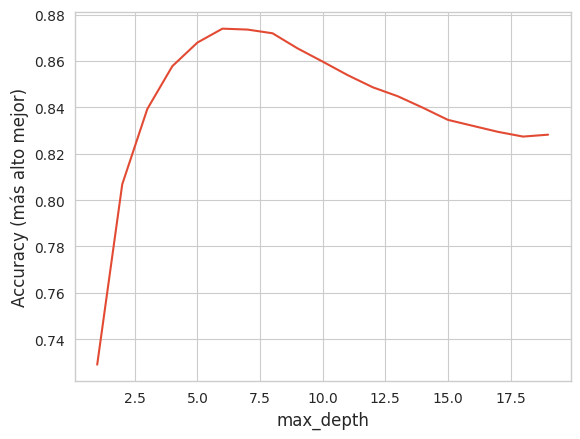

In [121]:
# plot max_depth (x-axis) versus accuracy (y-axis)
plt.plot(max_depth_range, mean_accuracy_scores)
plt.xlabel('max_depth')
plt.ylabel('Accuracy (más alto mejor)')

### Tuning de parámetros (Número mínimo de casos)

In [122]:
# list of values to try for max_depth
min_samples_range = range(1, 100)

# list to store the average RMSE for each value of max_depth
mean_accuracy_scores = []

# use 10-fold cross-validation with each value of max_depth
#from sklearn.cross_validation import cross_val_score
for samples in min_samples_range:
    clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100,max_depth=7, min_samples_leaf=samples)
    crossval_scores = cross_val_score(clf_gini, X_train, y_train, cv=10, scoring='roc_auc')
    mean_accuracy_scores.append(np.mean(crossval_scores))

Text(0, 0.5, 'Accuracy (lower is better)')

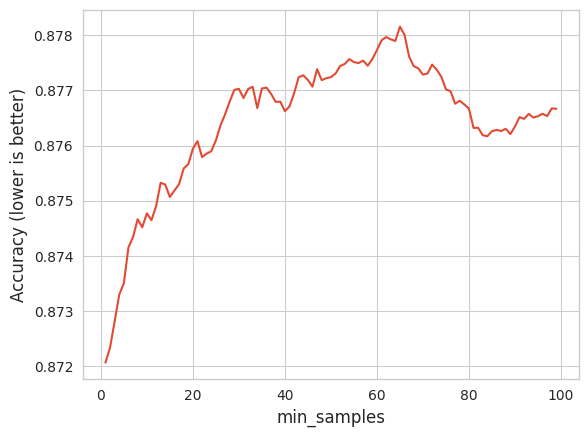

In [123]:
# plot max_depth (x-axis) versus accuracy (y-axis)
plt.plot(min_samples_range, mean_accuracy_scores)
plt.xlabel('min_samples')
plt.ylabel('Accuracy (lower is better)')

In [124]:
# list of values to try for max_depth
min_samples_range = range(20, 40)

# list to store the average RMSE for each value of max_depth
mean_accuracy_scores = []

# use 10-fold cross-validation with each value of max_depth
#from sklearn.cross_validation import cross_val_score
for samples in min_samples_range:
    clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100,max_depth=7, min_samples_leaf=samples)
    crossval_scores = cross_val_score(clf_gini, X_train, y_train, cv=10, scoring = 'roc_auc')
    mean_accuracy_scores.append(np.mean(crossval_scores))

Text(0, 0.5, 'Accuracy (lower is better)')

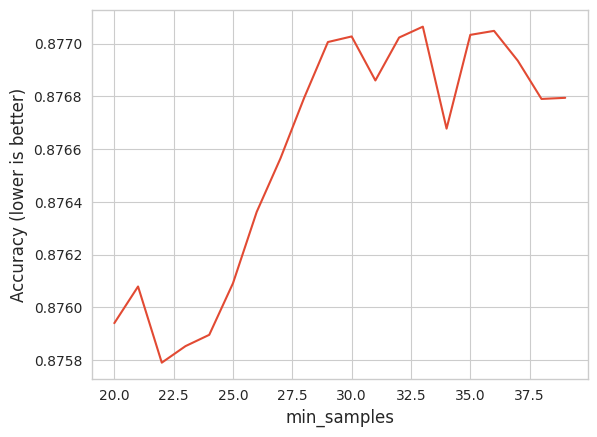

In [125]:
# plot max_depth (x-axis) versus accuracy (y-axis)
plt.plot(min_samples_range, mean_accuracy_scores)
plt.xlabel('min_samples')
plt.ylabel('Accuracy (lower is better)')

In [126]:
mean_accuracy_scores

[0.8759405457338799,
 0.8760794638890186,
 0.8757908081059425,
 0.875853495210054,
 0.8758963037732934,
 0.8760918250686764,
 0.8763622290811661,
 0.8765649428776532,
 0.8767948283624494,
 0.8770060636499364,
 0.8770272485046595,
 0.8768604343208042,
 0.877023076435371,
 0.8770643729471781,
 0.8766778428014789,
 0.8770332508418385,
 0.8770483955093376,
 0.8769354106438925,
 0.8767903779025229,
 0.8767946319752713]

### Decision Tree with the best parameters

In [127]:
clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100,max_depth=7, min_samples_leaf=33)

clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=7, min_samples_leaf=33, random_state=100)

In [128]:
y_pred = clf_gini.predict(X_test)
y_pred

array([0, 0, 1, ..., 0, 1, 0])

In [129]:
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, y_pred)
accuracy = metrics.accuracy_score(y_test, y_pred)
roc_auc = metrics.roc_auc_score(y_test, y_pred)
print(cm)
print("accuracy = " + str(accuracy))
print("roc_auc = " + str(roc_auc))

[[7495  662]
 [1122 1466]]
accuracy = 0.8339692880409493
roc_auc = 0.7426516495537063


In [130]:
pd.crosstab(y_test,y_pred
                  ,rownames = ['Real']
                  ,colnames = ['Predicho'])

Predicho,0,1
Real,,
0,7495,662
1,1122,1466


In [131]:
print ('\n \n')

print (metrics.classification_report(y_test,y_pred))


 

              precision    recall  f1-score   support

           0       0.87      0.92      0.89      8157
           1       0.69      0.57      0.62      2588

    accuracy                           0.83     10745
   macro avg       0.78      0.74      0.76     10745
weighted avg       0.83      0.83      0.83     10745



## Random Forest

In [132]:
from sklearn.ensemble import RandomForestClassifier

In [133]:
rfcla = RandomForestClassifier()
rfcla.fit(X_train)

RandomForestClassifier()

In [139]:
rfcla.fit(X_train,y_train)

RandomForestClassifier()

In [140]:
y_pred_train = rfcla.predict(X_train)
y_pred_test = rfcla.predict(X_test)

In [141]:
# Paso N°03: Revisamos las metricas de validacion técnicas adecuadas!

# Matriz de confusion
print("Matriz confusion: Train")
cm_train = metrics.confusion_matrix(y_train,y_pred_train)
print(cm_train)

print("Matriz confusion: Test")
cm_test = metrics.confusion_matrix(y_test,y_pred_test)
print(cm_test)

# Accuracy
print("Accuracy: Train")
accuracy_train=metrics.accuracy_score(y_train,y_pred_train)
print(accuracy_train)

print("Accuracy: Test")
accuracy_test=metrics.accuracy_score(y_test,y_pred_test)
print(accuracy_test)

# Precision o Aporte del Modelo
print("Precision: Train")
precision_train=metrics.precision_score(y_train,y_pred_train)
print(precision_train)

print("Precision: Test")
precision_test=metrics.precision_score(y_test,y_pred_test)
print(precision_test)

# Recall o Sensibilidad
print("Recall: Train")
recall_train=metrics.recall_score(y_train,y_pred_train)
print(recall_train)

print("Recall: Test")
recall_test=metrics.recall_score(y_test,y_pred_test)
print(recall_test)

Matriz confusion: Train
[[16292   270]
 [  323  4930]]
Matriz confusion: Test
[[7349  808]
 [1134 1454]]
Accuracy: Train
0.9728168691267477
Accuracy: Test
0.8192647743136342
Precision: Train
0.948076923076923
Precision: Test
0.6427939876215738
Recall: Train
0.9385113268608414
Recall: Test
0.5618238021638331


### Tuning n_estimators

One important tuning parameter is **n_estimators**, which is the number of trees that should be grown. It should be a large enough value that the error seems to have "stabilized".

In [142]:
# list of values to try for n_estimators
estimator_range = range(300, 600, 10)

# list to store the average RMSE for each value of n_estimators
mean_accuracy_scores = []

# use 5-fold cross-validation with each value of n_estimators (WARNING: SLOW!)
for estimator in estimator_range:
    rfcla = RandomForestClassifier(n_estimators=estimator, random_state=123, n_jobs=-1)
    crossval_scores = cross_val_score(rfcla, X_train, y_train, cv=5, scoring='roc_auc')
    mean_accuracy_scores.append(np.mean(crossval_scores))

Text(0, 0.5, 'Accuracy (lower is better)')

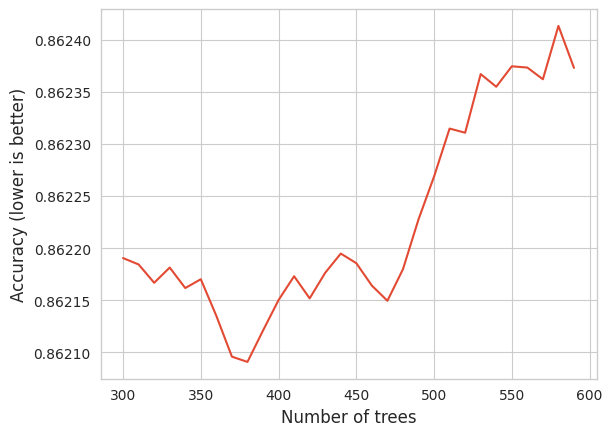

In [143]:
# plot max_depth (x-axis) versus accuracy (y-axis)
plt.plot(estimator_range, mean_accuracy_scores)
plt.xlabel('Number of trees')
plt.ylabel('Accuracy (lower is better)')

### Tuning max_features

The other important tuning parameter is **max_features**, which is the number of features that should be considered at each split.

In [144]:
X_train.shape[1]

11

In [145]:
X_train

,age,education_num,hours_per_week,workclass,education,marital_status,occupation,relationship,race,gender,native_country
12204,54.0,15.0,65.0,3,14,4,9,2,4,0,37
13088,25.0,13.0,40.0,3,9,4,12,3,4,0,37
30159,33.0,10.0,30.0,3,15,4,0,3,4,0,37
28892,38.0,14.0,40.0,3,12,2,9,0,2,1,37
13221,32.0,9.0,40.0,3,11,2,13,0,4,1,37
...,...,...,...,...,...,...,...,...,...,...,...
4788,54.0,9.0,38.0,6,11,5,3,4,4,0,37
321,20.0,10.0,30.0,3,15,2,11,0,4,1,37
5644,46.0,9.0,30.0,3,11,0,12,1,4,0,37
10882,37.0,10.0,50.0,3,15,2,0,0,4,1,37


In [147]:
# list of values to try for n_estimators
feature_range = range(1, X_train.shape[1]+1)

# list to store the average RMSE for each value of n_estimators
mean_accuracy_scores = []

# use 5-fold cross-validation with each value of n_estimators (WARNING: SLOW!)
for feature in feature_range:
    rfcla = RandomForestClassifier(n_estimators=5,max_features=feature,random_state=123, n_jobs=-1)
    crossval_scores = cross_val_score(rfcla, X_train, y_train, cv=5, scoring='roc_auc')
    mean_accuracy_scores.append(np.mean(crossval_scores))

Text(0, 0.5, 'Accuracy (lower is better)')

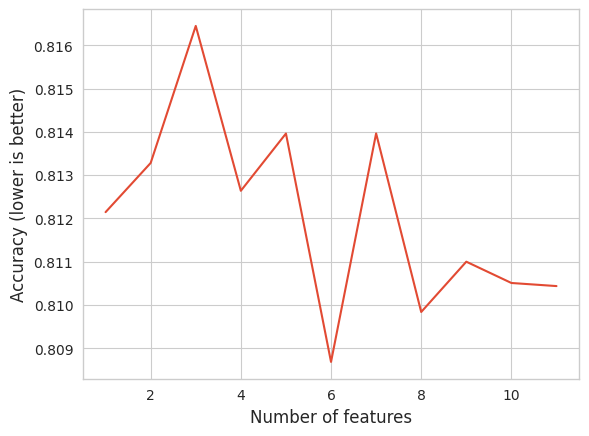

In [148]:
# plot max_depth (x-axis) versus accuracy (y-axis)
plt.plot(feature_range, mean_accuracy_scores)
plt.xlabel('Number of features')
plt.ylabel('Accuracy (lower is better)')

In [149]:
mean_accuracy_scores

[0.8121440941601014,
 0.8132801820603172,
 0.8164468920564609,
 0.8126373774358668,
 0.8139603586154719,
 0.8086830238704621,
 0.8139629021831937,
 0.8098367680850027,
 0.8109990564573962,
 0.8105070376135451,
 0.8104356598296276]

### Random Forest with the best parameters

In [150]:
from sklearn.ensemble import RandomForestClassifier
rfcla = RandomForestClassifier()
rfcla

RandomForestClassifier()

In [152]:
rfcla = RandomForestClassifier(n_estimators=5,max_features=19,random_state=123, n_jobs=-1)
rfcla.fit(X_train, y_train)

RandomForestClassifier(max_features=19, n_estimators=5, n_jobs=-1,
                       random_state=123)

In [153]:
y_pred = rfcla.predict(X_test)
y_pred

array([0, 0, 1, ..., 0, 1, 0])

In [154]:
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, y_pred)
accuracy = metrics.accuracy_score(y_test, y_pred)
roc_auc = metrics.roc_auc_score(y_test, y_pred)
print(cm)
print("accuracy = " + str(accuracy))
print("roc_auc = " + str(roc_auc))

[[7204  953]
 [1184 1404]]
accuracy = 0.8011167985109353
roc_auc = 0.7128358476490831


In [155]:
pd.crosstab(y_test,y_pred
                  ,rownames = ['Real']
                  ,colnames = ['Predicho'])

Predicho,0,1
Real,,
0,7204,953
1,1184,1404


In [156]:
print ('\n \n')

print (metrics.classification_report(y_test,y_pred))


 

              precision    recall  f1-score   support

           0       0.86      0.88      0.87      8157
           1       0.60      0.54      0.57      2588

    accuracy                           0.80     10745
   macro avg       0.73      0.71      0.72     10745
weighted avg       0.80      0.80      0.80     10745

